## EDA Global Superstore 2016 Dataset 

### Import library

In [1]:
import os 
import re
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns

### Loading Dataset

#### Cek file pada direktori

In [2]:
os.listdir('.')

['global_superstore_2016_orders.csv', 'superstore.ipynb']

#### Load dataset
__Perhatian__ : Setiap dataset dalam bentuk csv memiliki beragam delimiter. Pada dataset ini memiliki delimiter koma. Dataset csv lain mungkin menggunakan _semicolon_. Buka file sebelum load kedalam Dataframe

In [3]:
df = pd.read_csv('global_superstore_2016_orders.csv', delimiter=',')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,$-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,$-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


#### Ubah penulisan nama kolom
Penggunaan _underscore_ sebagai pemisah antar kata dan ditulis dengan huruf kecil akan lebih mempermudah dalam pemanggilan kolom

In [4]:
df.columns = [column.lower().replace('-', '_').replace(' ', '_') for column in df.columns]

df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'postal_code', 'city',
       'state', 'country', 'region', 'market', 'product_id', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

#### Cek informasi dari data (tipe data, null values dll)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          51290 non-null  int64  
 1   order_id        51290 non-null  object 
 2   order_date      51290 non-null  object 
 3   ship_date       51290 non-null  object 
 4   ship_mode       51290 non-null  object 
 5   customer_id     51290 non-null  object 
 6   customer_name   51290 non-null  object 
 7   segment         51290 non-null  object 
 8   postal_code     9994 non-null   float64
 9   city            51290 non-null  object 
 10  state           51290 non-null  object 
 11  country         51290 non-null  object 
 12  region          51290 non-null  object 
 13  market          51290 non-null  object 
 14  product_id      51290 non-null  object 
 15  category        51290 non-null  object 
 16  sub_category    51290 non-null  object 
 17  product_name    51290 non-null 

### Data Cleansing

#### Null values data 
Dataset terdiri atas 51290 baris dan 24 kolom. Informasi diatas menunjukkan bahwa beberapa kolom ada yang bernilai null. Selanjutnya adalah menemukan kolom mana saja yang nilainya null

In [6]:
df.isnull().sum()

row_id                0
order_id              0
order_date            0
ship_date             0
ship_mode             0
customer_id           0
customer_name         0
segment               0
postal_code       41296
city                  0
state                 0
country               0
region                0
market                0
product_id            0
category              0
sub_category          0
product_name          0
sales                 0
quantity              0
discount              0
profit                0
shipping_cost         0
order_priority        0
dtype: int64

Postal code adalah kolom dengan null values didalamnya. Karena tidak begitu diperlukan maka kita dapat isi dengan karakter kosong atau tanda strip

In [7]:
df.postal_code = df.postal_code.fillna('')

In [8]:
df.isnull().sum()

row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
postal_code       0
city              0
state             0
country           0
region            0
market            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
dtype: int64

#### Duplicate data
Cek apakah ada data yang duplikat antara baris satu dengan baris lainnya. Mengingat dataset adalah data penjualan yang sifatnya unik disetiap baris, seharusnya tidak ada data yang duplikat

In [9]:
df.duplicated().sum()

0

In [10]:
df[df.duplicated() == True ]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,postal_code,city,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority


### Data Wrangling

#### Data dengan tipe dan format yang keliru
Terdapat data dengan tipe data dan format yang tidak tepat sehingga kita perlu ubah menjadi tipe dan format yang sesuai. Kolom order_date, ship_date, postal_code, sales, profit dan shipping_cost adalah contoh kolom dengan format yang tidak tepat. Hal tersebut terlihat ketika 5 baris teratas di dataset ditampilkan

#### Tipe data tanggal

In [11]:
df.order_date = pd.to_datetime(df.order_date)

df.order_date.head()

0   2014-11-11
1   2014-02-05
2   2014-10-17
3   2014-01-28
4   2014-11-05
Name: order_date, dtype: datetime64[ns]

In [12]:
df.ship_date = pd.to_datetime(df.ship_date)

df.ship_date.head()

0   2014-11-13
1   2014-02-07
2   2014-10-18
3   2014-01-30
4   2014-11-06
Name: ship_date, dtype: datetime64[ns]

#### Postal Code
Penulisan postal code seharusnya tanpa floating point '.0'

In [13]:
df.postal_code = df.postal_code.apply(lambda x : re.sub('\.0', '', str(x)))

df.postal_code.head()

0    73120
1         
2         
3         
4         
Name: postal_code, dtype: object

#### Sales, profit & shipping cost

In [14]:
df.sales = df.sales.apply(lambda x : x.replace('$', '').replace(',', ''))
df.sales = df.sales.astype('float')

df.sales.head()

0     221.98
1    3709.40
2    5175.17
3    2892.51
4    2832.96
Name: sales, dtype: float64

In [15]:
df.profit = df.profit.apply(lambda x : x.replace('$', '').replace(',', ''))
df.profit = df.profit.astype('float')

df.profit.head()

0     62.15
1   -288.77
2    919.97
3    -96.54
4    311.52
Name: profit, dtype: float64

### Exploratory Data Analysis

#### Segmentasi penjualan

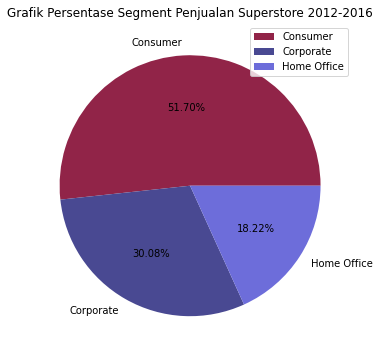

In [16]:
plt.figure(figsize=(8,6))

plt.pie(df.segment.value_counts(), labels=df.segment.value_counts().index, autopct='%.2f%%', colors=sns.color_palette('gist_stern'))
plt.title('Grafik Persentase Segment Penjualan Superstore 2012-2016')

plt.legend()
plt.show()

#### Segmentasi Kategori Penjualan

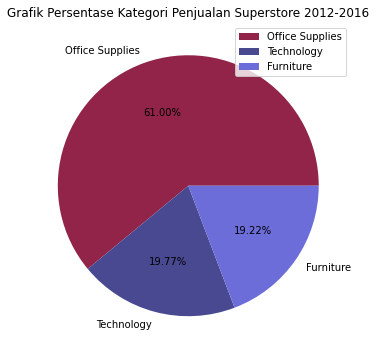

In [17]:
plt.figure(figsize=(8,6))

plt.pie(df.category.value_counts(), labels=df.category.value_counts().index, autopct='%.2f%%', colors=sns.color_palette('gist_stern'))
plt.title('Grafik Persentase Kategori Penjualan Superstore 2012-2016')

plt.legend()
plt.show()

#### Penjualan berdasarkan sub kategori produk

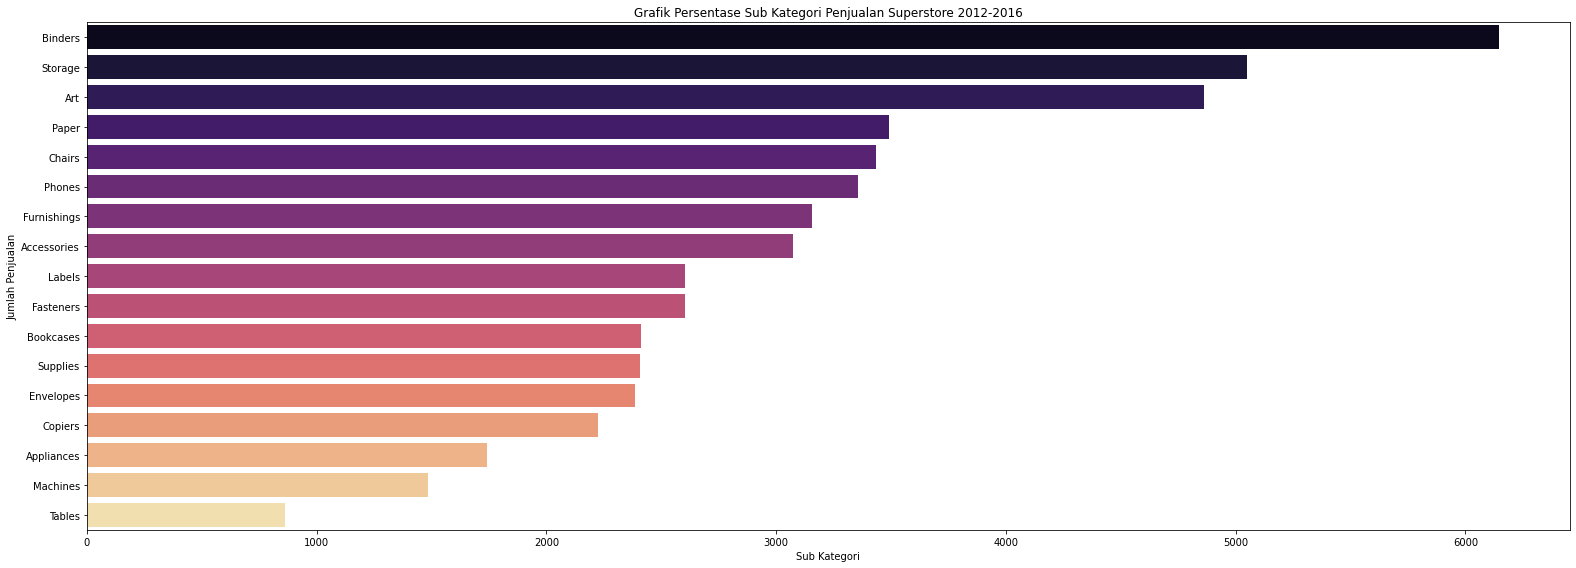

In [18]:
plt.figure(figsize=(22,8))

sns.barplot(x=df.sub_category.value_counts(), y=df.sub_category.value_counts().index, palette='magma')

plt.title('Grafik Persentase Sub Kategori Penjualan Superstore 2012-2016')
plt.xlabel('Sub Kategori')
plt.ylabel('Jumlah Penjualan')

plt.tight_layout()
plt.show()

#### Resampling data berdasarkan bulan

In [19]:
df_resample = (df.set_index('order_date')).resample('M').sum().reset_index()

df_resample.head()

,order_date,row_id,sales,quantity,discount,profit,shipping_cost
0,2012-01-31,12288294,98898.53,1463,68.758,8321.76,10596.7880
1,2012-02-29,11980366,103718.01,1401,58.192,14323.02,12051.3230
2,2012-03-31,13894063,135746.52,1745,74.272,13089.59,12207.4935
3,2012-04-30,14688313,114332.99,1934,74.782,13211.11,12631.0520
4,2012-05-31,16010056,158228.35,2167,87.472,14644.10,17691.7640


#### Total penjualan per bulan Superstore 2012-2016

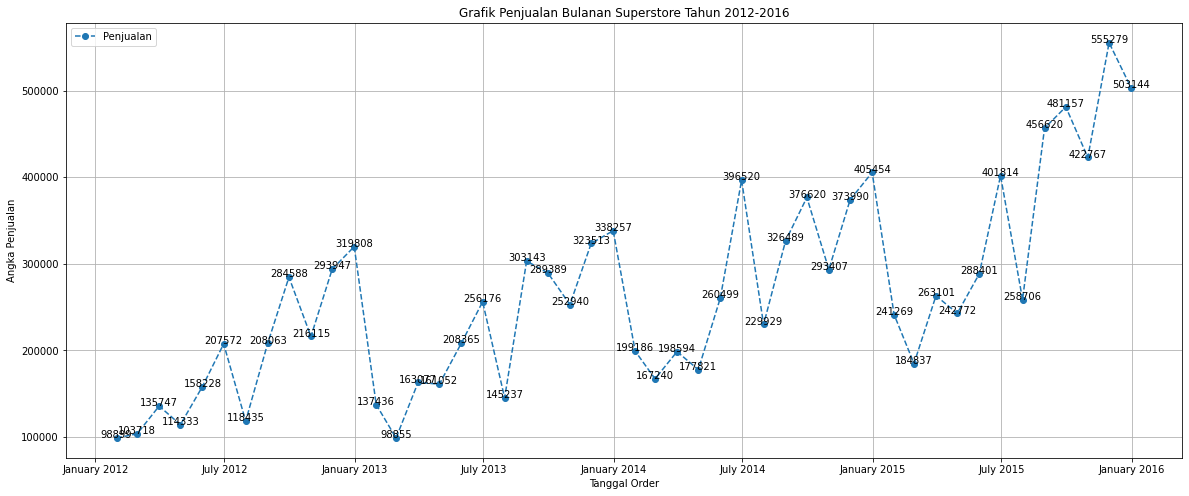

In [20]:
fig, ax = plt.subplots(figsize=(20,8))

ax.plot(df_resample.order_date, df_resample.sales, '--', marker='o')

for x, y in zip(df_resample.order_date, df_resample.sales):
    label = "{:.0f}".format(y)

    plt.annotate(label, (x,y), ha='center')

plt.title('Grafik Penjualan Bulanan Superstore Tahun 2012-2016')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))

plt.xlabel('Tanggal Order')
plt.ylabel('Angka Penjualan')

plt.legend(['Penjualan'])
plt.grid()
plt.show()

#### Total keuntungan per bulan Superstore 2012-2016

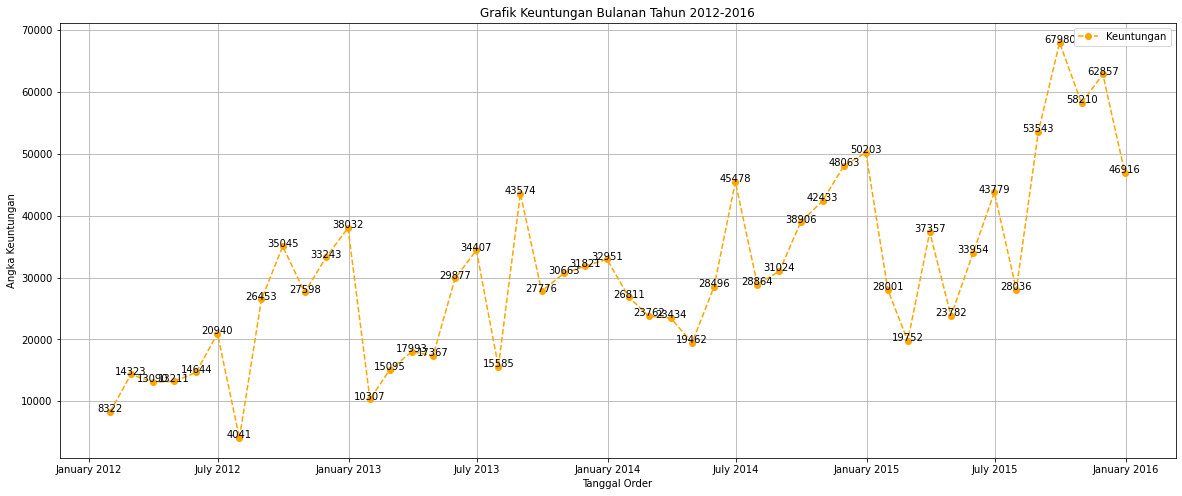

In [21]:
fig, ax = plt.subplots(figsize=(20,8))

plt.plot(df_resample.order_date, df_resample.profit, '--', marker='o', color='orange')

for x, y in zip(df_resample.order_date, df_resample.profit):
    label = "{:.0f}".format(y)

    plt.annotate(label, (x,y), ha='center')

plt.title('Grafik Keuntungan Bulanan Tahun 2012-2016')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))

plt.xlabel('Tanggal Order')
plt.ylabel('Angka Keuntungan')

plt.legend(['Keuntungan'])
plt.grid()
plt.show()

#### 10 Negara dengan penjualan tertinggi

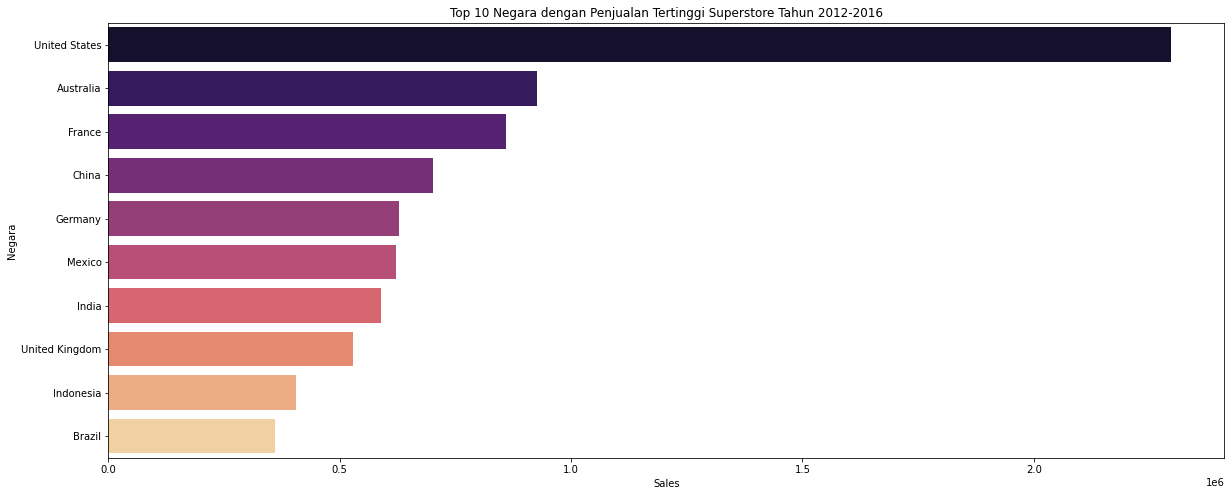

In [22]:
df_temp = df[['country', 'sales']].groupby('country').sum().reset_index().sort_values(by='sales', ascending=False).head(10)

plt.figure(figsize=(20,8))

sns.barplot(data=df_temp, x='sales', y='country', palette='magma')

plt.title('Top 10 Negara dengan Penjualan Tertinggi Superstore Tahun 2012-2016')
plt.xlabel('Sales')
plt.ylabel('Negara')

plt.show()

#### 10 Negara dengan penjualan terendah

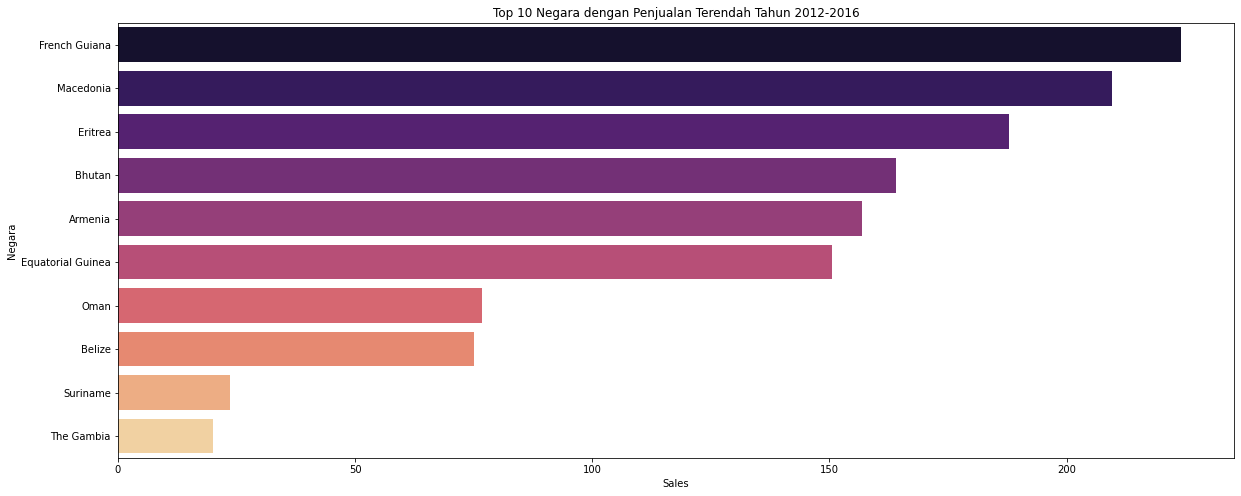

In [23]:
df_temp = df[['country', 'sales']].groupby('country').sum().reset_index().sort_values(by='sales', ascending=False).tail(10)

plt.figure(figsize=(20,8))

sns.barplot(data=df_temp, x='sales', y='country', palette='magma')

plt.title('Top 10 Negara dengan Penjualan Terendah Tahun 2012-2016')
plt.xlabel('Sales')
plt.ylabel('Negara')

plt.show()

#### 10 Pelanggan dengan penjualan tertinggi

In [24]:
df_temp = df[['customer_id', 'customer_name', 'country', 'sales', 'quantity']].groupby(['customer_id', 'customer_name', 'country']).sum().reset_index().sort_values(by='sales', ascending=False).head(10)

df_temp

,customer_id,customer_name,country,sales,quantity
15376,SM-203201408,Sean Miller,United States,23669.21,27
16285,TC-209801402,Tamara Chand,United States,18437.14,24
13636,RB-193601404,Raymond Buch,United States,14345.28,23
16019,TA-213851406,Tom Ashbrook,United States,13723.50,22
136,AB-101051402,Adrian Barton,United States,12181.60,48
5035,DP-131057,Dave Poirier,Australia,11864.15,64
6238,FH-1436582,Fred Hopkins,Mexico,10880.17,61
1979,BM-111401402,Becky Martin,United States,10539.90,37
7162,HL-150401406,Hunter Lopez,United States,10522.55,5
2705,CA-1277558,Cynthia Arntzen,India,10463.01,36


#### 3 State (Negara Bagian) dengan penjualan tertinggi ditiap regional

In [37]:
df_temp = pd.pivot_table(data=df, index=['region', 'state'], values=['sales'], aggfunc='sum')

df_temp['ranks'] = df_temp.groupby(by=['region']).rank(ascending=False)

df_temp.ranks = df_temp['ranks'].astype('int')

df_temp = df_temp[df_temp.ranks < 4]

df_temp

sales  ranks
region         state                                       
Canada         British Columbia              9544.38      3
               Ontario                      35450.40      1
               Quebec                       10924.17      2
Caribbean      Granma                       17002.53      3
               Santiago de Cuba             32452.55      2
...                                              ...    ...
Western Europe North Rhine-Westphalia      216451.95      2
               Provence-Alpes-Côte d'Azur  114372.35      3
Western US     Arizona                      35282.02      3
               California                  457687.68      1
               Washington                  138641.29      2

[69 rows x 2 columns]